In [1]:
import pandas as pd
import seaborn as sns

In [2]:
t=sns.load_dataset('titanic')
t.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [4]:
t.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [6]:
tf =t.loc[:,['survived','pclass','age','sibsp','fare']]
tf.head()

,survived,pclass,age,sibsp,fare
0,0,3,22.0,1,7.2500
1,1,1,38.0,1,71.2833
2,1,3,26.0,0,7.9250
3,1,1,35.0,1,53.1000
4,0,3,35.0,0,8.0500


In [7]:
tf.shape

(891, 5)

In [8]:
tf.isna().sum()

survived      0
pclass        0
age         177
sibsp         0
fare          0
dtype: int64

In [12]:
ag=tf.age.mean()
round(ag,2)

29.7

In [14]:
#handle missing value
tf.age.fillna(29.7,inplace=True)

In [15]:
tf.isna().sum()

survived    0
pclass      0
age         0
sibsp       0
fare        0
dtype: int64

We have cleaned data now lets separate inp and out

In [22]:
inp =tf.iloc[:,1:]
inp[:2]

,pclass,age,sibsp,fare
0,3,22.0,1,7.2500
1,1,38.0,1,71.2833


In [23]:
out =tf.survived
out[:2]

0    0
1    1
Name: survived, dtype: int64

In [24]:
#80% training and 20% tetsing

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
train_inp,test_inp,train_out,test_out = train_test_split(inp,out,train_size = .8,random_state =54)  
#random_state used for to keep shuffled data constant 

In [29]:
train_inp[:3]

,pclass,age,sibsp,fare
530,2,2.0,1,26.000
715,3,19.0,0,7.650
579,3,32.0,0,7.925


<AxesSubplot:>

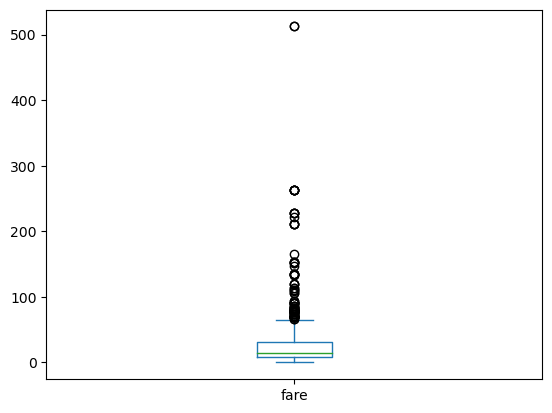

In [30]:
train_inp['fare'].plot(kind ='box')

In [32]:
len(train_inp)

712

In [33]:
len(test_inp)

179

# Training Phase

In [34]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [35]:
mnb.fit(train_inp,train_out)

MultinomialNB()

In [36]:
#before testing check goodness of data
mnb.score(train_inp,train_out)*100 

69.52247191011236

In [37]:
mnb.score(test_inp,test_out)*100

68.71508379888269

In [38]:
mnb.score(inp,out)*100

69.36026936026936

# Prediction/Testing

In [39]:
mnb.predict(test_inp) #test_inp is predicted out

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [40]:
test_out.values

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1], dtype=int64)

In [41]:
mnb.predict(train_inp)

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [42]:
train_inp[train_inp['fare']>500]

,pclass,age,sibsp,fare
679,1,36.0,0,512.3292
737,1,35.0,0,512.3292


In [43]:
#remove entry at index 679 and 737 to remove outliers
train_inp.drop(index =679,inplace =True)
train_inp.drop(index = 737,inplace =True)

In [44]:
train_inp[train_inp['fare']>500]

,pclass,age,sibsp,fare


<AxesSubplot:>

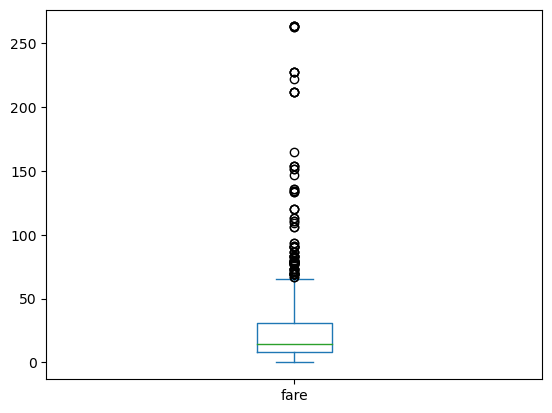

In [45]:
train_inp['fare'].plot(kind ='box')

In [46]:
train_inp.shape

(710, 4)

In [50]:
len(train_inp)

710

In [51]:
len(train_out)

712

In [48]:
#Create a new model
mnb2 = MultinomialNB()

In [53]:
train_out.drop(index=679,inplace=True)
train_out.drop(index=737,inplace=True)


In [54]:
mnb2.fit(train_inp,train_out)

MultinomialNB()

In [55]:
mnb2.score(train_inp,train_out)*100

69.29577464788733

In [56]:
mnb2.predict(test_inp)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [58]:
mnb2.predict(train_inp)

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<AxesSubplot:>

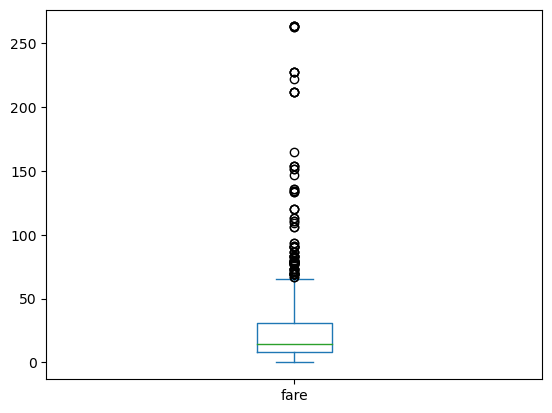

In [59]:
train_inp['fare'].plot(kind='box')

In [64]:
train_inp[train_inp['fare']>260]

,pclass,age,sibsp,fare
742,1,21.0,2,262.375
311,1,18.0,2,262.375
438,1,64.0,1,263.000
88,1,23.0,3,263.000
341,1,24.0,3,263.000
27,1,19.0,3,263.000


In [65]:
mnb2.score(train_inp,train_out)*100


69.29577464788733

In [66]:
mnb2.score(test_inp,test_out)*100


67.59776536312849

In [67]:
mnb2.score(inp,out)*100


69.02356902356902